You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough. There is an execption to this rule for unit 4: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Other seasons are allowed as well.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- All students are allowed to use this data set: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Why? This is could lead to similar analysis as the soccer data analysis--basically, I think this data set will work well with the models we ran in class. Let me know if you have questions about downloading and cleaning the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit4NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


Topic: The trend of Steals correlating to position in the basketball data.

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

In [14]:
#https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv

#load the data from my github page.
#cs stands for chemical shift data
url_cs = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
#I could have put the url string directly into pd.read_csv()
cs_data = pd.read_csv(url_cs,dtype={"Pos":"category"})
cs_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


In [15]:
import pandas as pd # Ensure pandas is imported

# From cell r_dxiMmhF7NU, ensuring cs_data is defined here
url_cs = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
cs_data = pd.read_csv(url_cs,dtype={"Pos":"category"})

#this is an array of the soccer positions,
#except they are given an int (number) label instead of a string (of letters)
pos_idx = cs_data.Pos.cat.codes.values

#an array of the four strings that represent position
pos_codes = cs_data.Pos.cat.categories

#puts coords in a dict, so pymc can read them
sccr_coords = {"pos": pos_codes}

<Axes: ylabel='STL'>

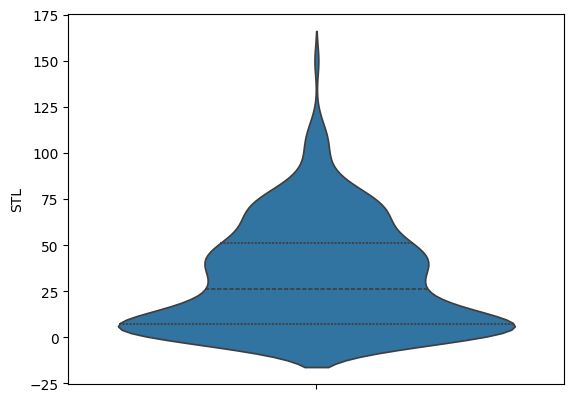

In [16]:
sns.violinplot(cs_data.STL,inner='quart')

Prior, utilzing the STL column in the dataset-> this will be used in the model in the creation of the hyarchial model.

In [ ]:
with pm.Model(coords=sccr_coords) as cs_nh_model:
    #priors
    #dims="aa" means to apply the prior seperately to each amino acid
    μ = pm.Normal('μ', mu=0, sigma=3,
                  dims="pos")
    σ = pm.HalfNormal('σ', sigma=3,
                      dims="pos")

    #The idx variable tells my model which diffs belong to the same amino acid
    #this will cause my model to generate a posterior for each amino acid
    y = pm.Normal('y',
                  mu = μ[pos_idx ],
                  sigma = σ[pos_idx],
                  observed=cs_data.STL)

    #cs for chemshift, nh for nonheirarchical
    idata_cs_nh = pm.sample()

Used a normal distribution for the non heirachical model.

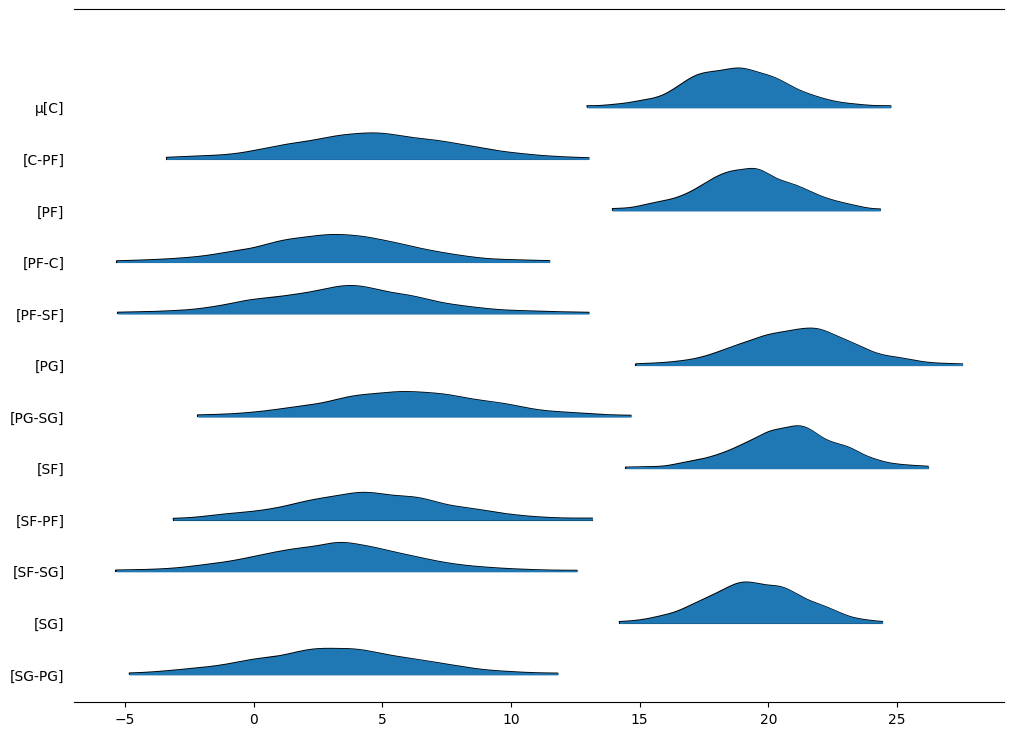

In [7]:
#plots the middle 99.7% of each amino acids' posterior distribution of the mean
#why 99.7%? No reason, just seems like a good number to me.
#Feel free to pick your own hdi %; the default is 94%.
axes = az.plot_forest(idata_cs_nh, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

In [ ]:

with pm.Model(coords=sccr_coords) as cs_h_model:
    # hyperpriors for the log of the rate parameter
    log_lam_mu = pm.Normal('log_lam_mu', mu=0, sigma=5) # Mean for log_lam
    log_lam_sd = pm.HalfNormal('log_lam_sd', sigma=5) # Standard deviation for log_lam

    # pr
    log_lam = pm.Normal('log_lam',
                        mu=log_lam_mu,
                        sigma=log_lam_sd,
                        dims="pos")

    # Likelihood: Steals (STL) follow an Exponential distribution
    # The rate parameter (lam) is the exponentiated log_lam for each position
    # Exponential distribution expects positive continuous data, while STL are counts.
    # Poisson or Negative Binomial are typically more appropriate for count data.
    y = pm.Exponential('y',
                       lam=1/(pm.math.exp(log_lam[pos_idx])),
                       observed=cs_data.STL)

    #cs for chemshift, h for heirarchical
    idata_cs_h = pm.sample()


This hierachical moidel utialzes the prior to predict the overall amount of Steals fro all the players.

In [ ]:
pm.sample_posterior_predictive(idata_cs_h, model=cs_h_model, extend_inferencedata=True)

(-10.0, 151.0)

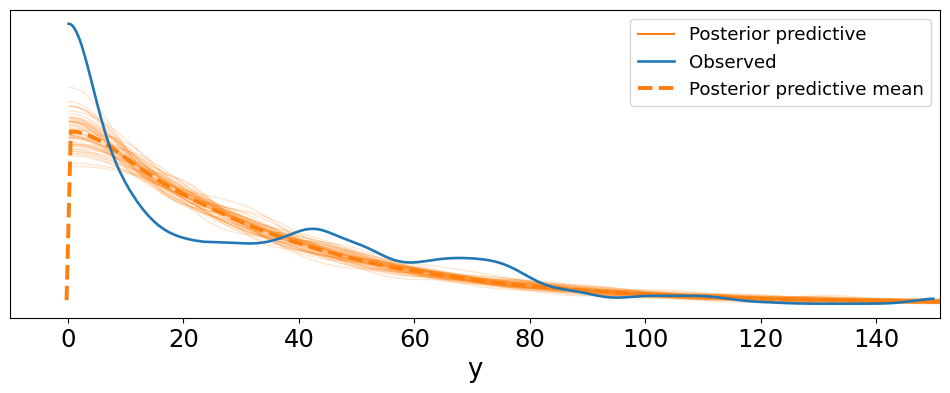

In [19]:
ax = az.plot_ppc(idata_cs_h, num_pp_samples=50, figsize=(12, 4), colors=["C1", "C0", "C1"])
#need to limit the x axis, so its more readable
ax.set_xlim(-10, 151)



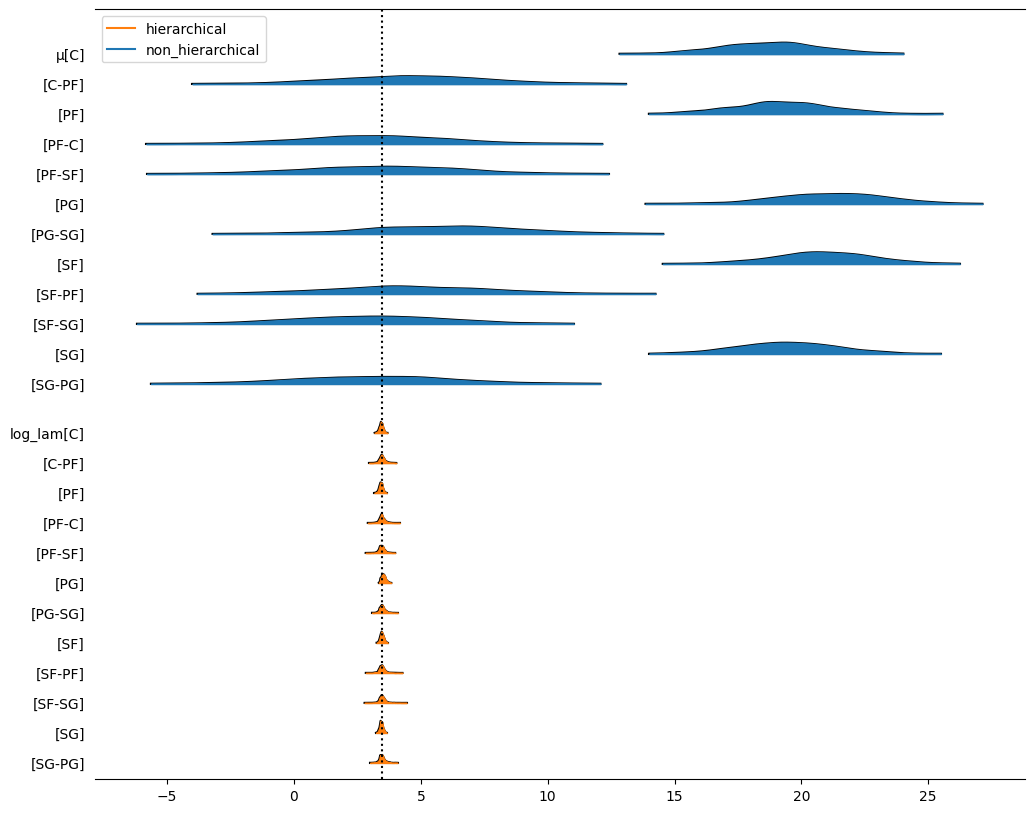

In [28]:

#plots a 99.7% hdi for the posteriors of both models on the same plot
# We'll plot 'μ' from the non-hierarchical model and 'log_lam' from the hierarchical model for comparison.
axes = az.plot_forest([idata_cs_nh, idata_cs_h], kind="ridgeplot",
                      model_names=['non_hierarchical', 'hierarchical'],
                      var_names=['μ','log_lam'], combined=True, figsize=(12, 10),hdi_prob=0.997)

#plots overall mean of the hierarchical model; do not confuse with 0
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_cs_h.posterior['log_lam_mu'].mean(), *y_lims, color="k", ls=":");

Based on the ridge plot above, it showcases that both models showcase difference in the Steals vs Position although the hierachical model is concentrated with the main components- and avoids less important elements. The non- heirachical model focuses on width of the camparison as well. The heirachical model could be improved to include a huge width of the data for a better analysis. Adddiotnaly, I wasn't so sure if the hierachical model had the best dstribution to work with, as I used the Exponential distribution- but I feel if I used the HalfStudentT distribution - I would have been able to get a better posterior.

Credit: Gemini for helping me understand and fixing my errors- specifically syntax error and how to interpet ridgeplots.